<a href="https://colab.research.google.com/github/icunicn/project-data/blob/main/Weighted_Product_for_Analyze_Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wighted Product

### Import Library

In [14]:
import numpy as np

**1. Kriteria dan Bobot Kriteria**

Kriteria dalam data tersebut merupakan kriteria kriteria yang digunakan untuk mempertimbangkan jurusan yang paling sesuai dengan kebutuhan. Bobot kriteria bisa disesuaikan dengan kebutuhan dari masing masing user.

<!-- Image -->
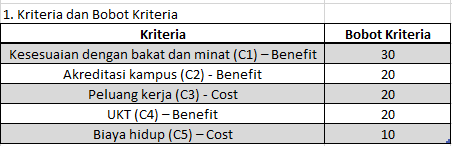
<!-- End Image -->

In [15]:
# Bobot awal kriteria
weights = np.array([30, 20, 20, 20, 10])

**2. Matriks Skor Tiap Kriteria untuk Tiap Alternatif**

Matriks ini di assign sesuai kriteria yang telah ditetapkan pada tabel sebelumnya. Nilai didasarkan pada kebutuhan user. Nilai dari setiap matriks dalam bentuk masih dalam bentuk text maupun numerik
<!-- Image -->
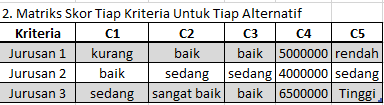
<!-- End Image -->

In [16]:
# Data kategori (asli)
data = np.array([
    ["kurang", "baik", "baik", 5000000, "rendah"],
    ["baik", "sedang", "sedang", 4000000, "sedang"],
    ["sedang", "sangat baik", "baik", 6500000, "tinggi"]
])

print("Matriks Keputusan")
for idx, jurusan in enumerate(data, start=1):
    print(f"Jurusan {idx}: {jurusan}")

Matriks Keputusan
Jurusan 1: ['kurang' 'baik' 'baik' '5000000' 'rendah']
Jurusan 2: ['baik' 'sedang' 'sedang' '4000000' 'sedang']
Jurusan 3: ['sedang' 'sangat baik' 'baik' '6500000' 'tinggi']


**3. Decision Metriks for Numerical Type**

At table 3, we have to change text type in table 2 to numerical data type. We can lead to next progress to normalize the metrics
<!-- Image -->
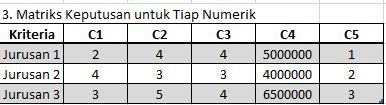
<!-- End Image -->

In [17]:
# Matriks keputusan dalam bentuk numerik
decision_matrix = np.array([
    [2, 4, 4, 5000000, 1],
    [4, 3, 3, 4000000, 2],
    [3, 5, 4, 6500000, 3]
])

print("\nMatriks Keputusan dalam Nilai Numerik")
print(decision_matrix)


Matriks Keputusan dalam Nilai Numerik
[[      2       4       4 5000000       1]
 [      4       3       3 4000000       2]
 [      3       5       4 6500000       3]]


**4. Decision Normalize Metrics**

We can normalize our table using this function in criteria 1, 2, 4 using MAX() because benefit criteria. In the other hand, in criteria 3 and 4 we use MIN() because it cost criteria

MAX() function:

<!-- Formulas -->
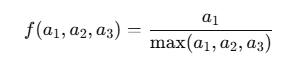
<!-- End Formula -->

function MIN():
<!-- function -->
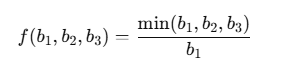
<!-- End Function -->


<!-- Image -->
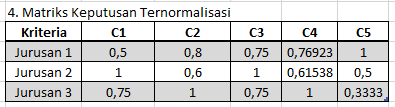
<!-- End Image -->

In [18]:
# Normalisasi bobot
normalized_weights = weights / np.sum(weights)

print("\nBobot Kriteria (C1 - C5)")
print(weights)


Bobot Kriteria (C1 - C5)
[30 20 20 20 10]


**5. Weighted Decision Metrics Table**

We can calculating our table by multiply decision metrics in table 4 with weighted criteria in table 1

<!-- Image -->
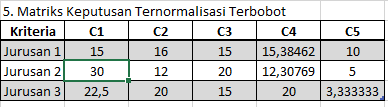
<!-- End Image -->

In [19]:
# Hitung nilai perkalian terbobot (S_i)
S = []
for i in range(len(decision_matrix)):
    product = 1
    for j in range(len(decision_matrix[i])):
        if j in (3, 4):  # Kriteria biaya (cost)
            product *= np.power(decision_matrix[i][j], -normalized_weights[j])
        else:            # Kriteria benefit
            product *= np.power(decision_matrix[i][j], normalized_weights[j])
    S.append(product)
S = np.array(S)

print("\nBobot Kriteria Ternormalisasi")
print(normalized_weights)

print("\nNilai Perkalian Terbobot (S_i)")
for idx, val in enumerate(S, start=1):
    print(f"Jurusan {idx}: {val}")



Bobot Kriteria Ternormalisasi
[0.3 0.2 0.2 0.2 0.1]

Nilai Perkalian Terbobot (S_i)
Jurusan 1: 0.09802548378789797
Jurusan 2: 0.1049425230664365
Jurusan 3: 0.09841189141335241


**6. Preference Score**

This Table is the result of the sum of each Major. We can conclude which major have good score that we can choose. In my table, major 3 have highest score compared to the others with 80,833333

<!-- Image -->
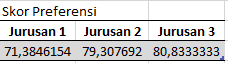
<!-- End Image -->